In [10]:
# Machine Learning Models
"""
Compare models using bar plot
Accuracy score algorithm
1. Logistic regression
2. KNN- K Nearest Neighbor
3. SVM- Support Vector Machines
4. Naive Bayes- Gaussian Naive Bayes
5. Decision Tree
6. Random Forest 
7. Confusion Matrices
"""

'\nCompare models using bar plot\nAccuracy score algorithm\n1. Logistic regression\n2. KNN- K Nearest Neighbor\n3. SVM- Support Vector Machines\n4. Naive Bayes- Gaussian Naive Bayes\n5. Decision Tree\n6. Random Forest \n7. Confusion Matrices\n'

In [11]:
# Importing libraries
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#ML for Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Control the display 
pd.options.display.max_columns= 50
sns.set(style= "darkgrid", rc= {'axes.facecolor': '#DCDCDC'})

# Ignore Warnings
import warnings

warnings.filterwarnings('ignore')

In [12]:
# Loading the dataset
import pandas as pd
df= pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [14]:
# Target is where our dataset will be normalised from
# Target is for testing and training takes the bigger percentage of data

# Logistic Regression
# Used to predict one or two possible outcomes(usually represented by 0 or 1)
# column targets
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [15]:
# Getting the mean
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


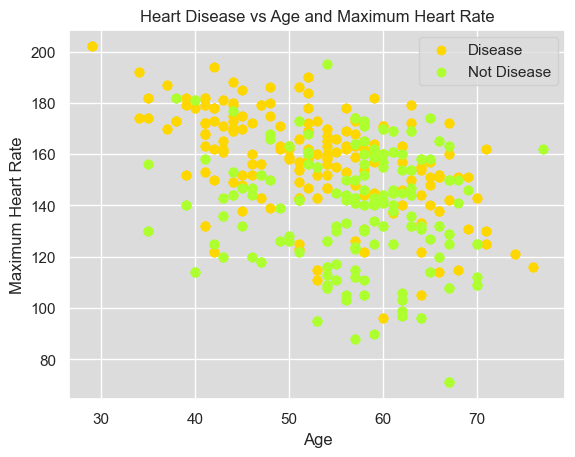

In [19]:
# Create a scatterplot for heart disease vs Age and Maximum 
plt.scatter(x= df.age[df.target==1], y= df.thalach[df.target==1], c= '#FFD700', label= 'Disease')
plt.scatter(x= df.age[df.target==0], y= df.thalach[df.target==0], c= '#ADFF2F', label= 'Not Disease')

# Add a legend
plt.legend()
# Add labels to the axes
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')

# Set the title of the plot
plt.title('Heart Disease vs Age and Maximum Heart Rate')

# Show the plot
plt.show()

In [21]:
# Create a logistic regression
# Helps to solve problems with classification 
# Create the independent variable and depedant variable

y= df.target.values
x_data= df.drop(['target'], axis= 1)

In [22]:
# Normlise the data
x= (x_data - np.min(x_data))/ (np.max(x_data)) - np.min(x_data)

In [23]:
# Splitt the data 80% for training and 20% for testing
# Webfirst need to store the different variables of our data
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 0)

In [24]:
# Transpose matrices
x_train= x_train.T
y_train= y_train.T
x_test= x_test.T
y_test= y_test.T

In [30]:
# Get the accuracy using the logistic regression
# Getting the Test Accuracy
accuracy= {}# Empty dict helps us get the x_train and the y_train data
lr= LogisticRegression()
lr.fit(x_train.T, y_train.T)
acc= lr.score(x_test.T, y_test.T) * 100

accuracy['LogisticRegression']= acc
print('Test Accuracy: {:.2f}%'.format(acc))

# Get output

Test Accuracy: 72.68%


In [35]:
# Import the K-Nearest Neighbor classfier
# To get accuracy score of the K-Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 2)
knn.fit(x_train.T, y_train.T)
prediction= knn.predict(x_test.T)

# Get output display
print('{} NN Score: {:.2f}%'.format(2, knn.score(x_test.T, y_test.T) * 100))

2 NN Score: 95.12%


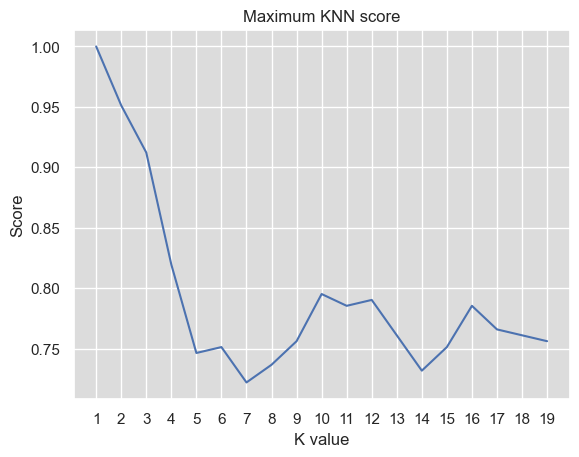

Maximum KNN score is 100.00%


In [39]:
# Getting the Maximum KNN score for the model
score_list= []
for i in range(1, 20):
    knn2= KNeighborsClassifier(n_neighbors= i) # Get n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    score_list.append(knn2.score(x_test.T, y_test.T))

# Show using line plot
plt.plot(range(1, 20), score_list)
plt.xticks(np.arange(1, 20, 1))
plt.xlabel('K value')
plt.ylabel('Score')
plt.title('Maximum KNN score')
plt.show()

# Get maxinmum KNN score in percentage
acc= max(score_list) * 100
accuracy['KNN']= acc
print('Maximum KNN score is {:.2f}%'.format(acc))

In [41]:
# Get Test accuracy using the Support Vector Machine (SVM) algorithm
from sklearn.svm import SVC
svm= SVC(random_state= 1)
svm.fit(x_train.T, y_train.T)
acc= svm.score(x_train.T, y_train.T) * 100
accuracy['SVM']= acc
print('Test Accuracy of SVM Algorithm: {:.2f}%'.format(acc))

Test Accuracy of SVM Algorithm: 70.24%


In [42]:
# Get accuracy using the Naive Bayes ALgorithm
from sklearn.naive_bayes import GaussianNB

nb= GaussianNB()
nb.fit(x_train.T, y_train.T)

acc= nb.score(x_test.T, y_test.T) * 100
accuracy['Naive Bayes']= acc
print('Accuracy of Naive Bayes: {:.2f}'.format(acc))

Accuracy of Naive Bayes: 85.37


In [44]:
# Get accuracy using decision tree model
from sklearn.tree import DecisionTreeClassifier

dtc= DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc= dtc.score(x_test.T, y_test.T) * 100
accuracy['Decision Tree']= acc

print('Decision Tree Test Accuracy: {:.2f}%'.format(acc))


Decision Tree Test Accuracy: 100.00%


In [46]:
# Get accuracy of the Random Forest Classifier Algorithm
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators= 1000, random_state= 1)
rf.fit(x_train.T, y_train.T)

acc= rf.score(x_test.T, y_test.T) * 100
accuracy['Random Forest:']= acc

print('Random Forest Algorithm Accuracy Score: {:.2f}%'.format(acc))

Random Forest Algorithm Accuracy Score: 100.00%


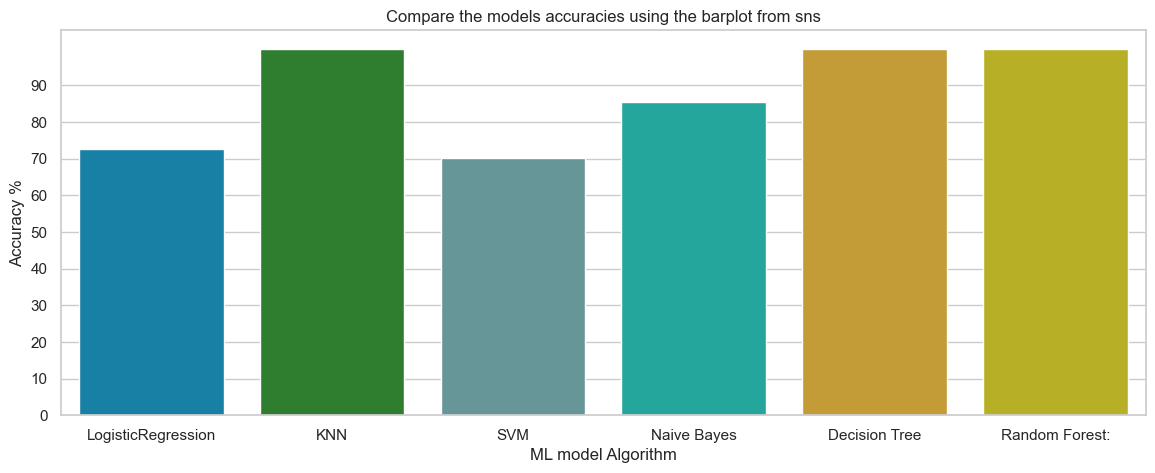

In [53]:
# Compare the models accuracies using the barplot from sns
colors= ['#008BBB', '#228B22', '#5F9EA0', '#0FBBAE', '#DAA520', '#CFC60E']

sns.set_style('whitegrid')
plt.figure(figsize= (14, 5))
plt.yticks(np.arange(0, 100, 10))
plt.title('Compare the models accuracies using the barplot from sns')
plt.ylabel('Accuracy %')
plt.xlabel('ML model Algorithm')
sns.barplot(x= list(accuracy.keys()), y= list(accuracy.values()), palette= colors)
plt.show()

In [ ]:
# ML Confusion Matrix
# Evaluate the performance of a classification model
"""_summary_
True Positive (TP): The number of instances predicted as positive (correctly classified as the positive class).
True Negative (TP): The number of instances predicted as negative (correctly classified as the negative class).
False Positive (TP): The number of instances incorrectly predicted as positive (incorrectly classified as the positive class).
False Negative (FN): The number of instances incorrectly predicted as negative (incorrectly classified as the negative class).
ROC Curve and AUC: (Receiver Operating Characteristic and Area Under Curve)
"""

In [57]:
# Get confusion matrices to look at the imbalance dataset
# Predicted values
y_head_lr= lr.predict(x_test.T)
knn3= KNeighborsClassifier(n_neighbors= 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn= knn3.predict(x_test.T)
y_head_svm= svm.predict(x_test.T)
y_head_nb= nb.predict(x_test.T)
y_head_dtc= dtc.predict(x_test.T)
y_head_rf= rf.predict(x_test.T)

In [63]:
# Import module for confusion matrix
from sklearn.metrics import confusion_matrix

cm_lr= confusion_matrix(y_test, y_head_lr)
cm_knn= confusion_matrix(y_test, y_head_knn)
cm_svm= confusion_matrix(y_test, y_head_svm)
cm_nb= confusion_matrix(y_test, y_head_nb)
cm_dtc= confusion_matrix(y_test, y_head_dtc)
cm_rf= confusion_matrix(y_test, y_head_rf)

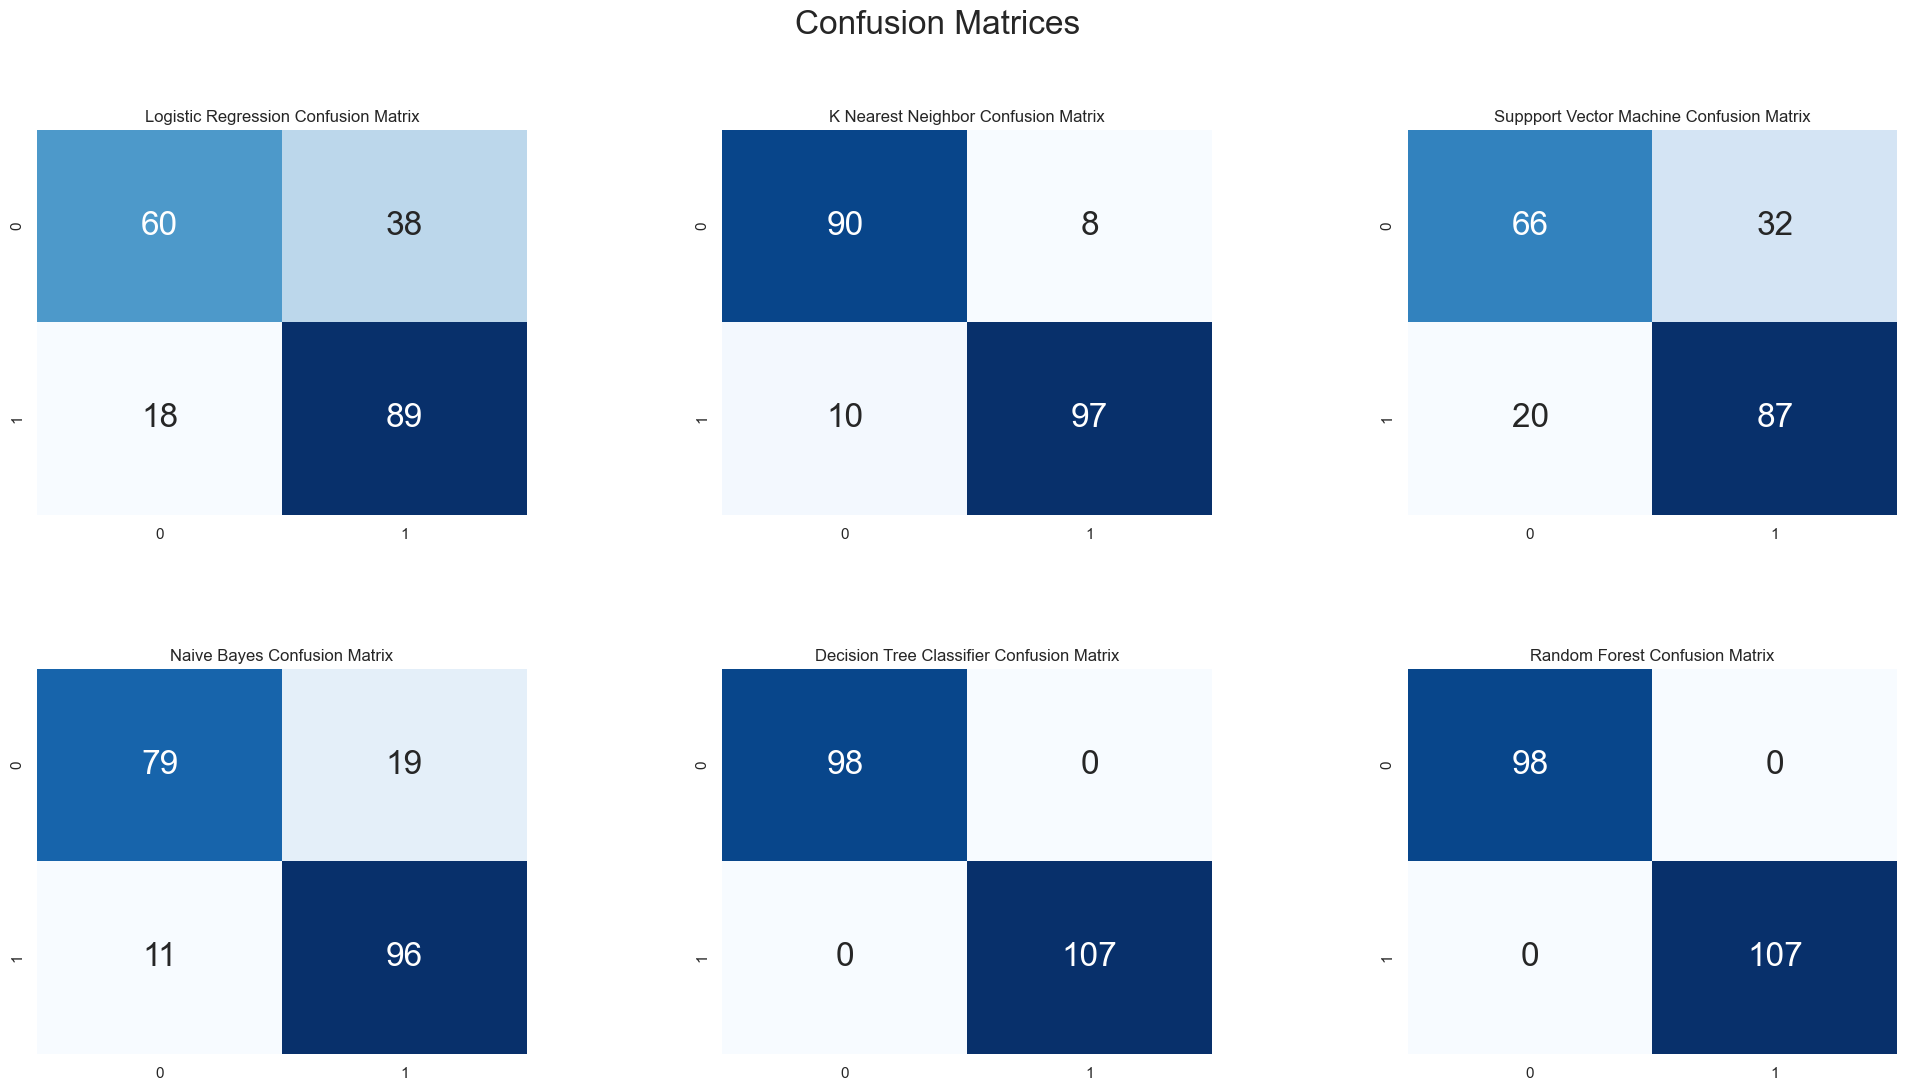

In [76]:
# Plotting for heatmap using confusion matrices
plt.figure(figsize=(24, 12))

plt.suptitle('Confusion Matrices', fontsize= 24)
plt.subplots_adjust(wspace= 0.4, hspace= 0.4)

# Confusion Matrix for Logistic Regression using HeatMap
plt.subplot(2, 3, 1)
plt.title('Logistic Regression Confusion Matrix')
sns.heatmap(cm_lr, annot= True, cmap= 'Blues', fmt= "d", cbar= False, annot_kws={'size': 24})

# Confusion Matrix for KNN using HeatMap
plt.subplot(2, 3, 2)
plt.title('K Nearest Neighbor Confusion Matrix')
sns.heatmap(cm_knn, annot= True, cmap= 'Blues', fmt= "d", cbar= False, annot_kws={'size': 24})

# Confusion Matrix for SVM using HeatMap
plt.subplot(2, 3, 3)
plt.title('Suppport Vector Machine Confusion Matrix')
sns.heatmap(cm_svm, annot= True, cmap= 'Blues', fmt= "d", cbar= False, annot_kws={'size': 24})

# Confusion Matrix for Naives Bayes using HeatMap
plt.subplot(2, 3, 4)
plt.title('Naive Bayes Confusion Matrix')
sns.heatmap(cm_nb, annot= True, cmap= 'Blues', fmt= "d", cbar= False, annot_kws={'size': 24})

# Confusion Matrix for Decision Tree Classifier using HeatMap
plt.subplot(2, 3, 5)
plt.title('Decision Tree Classifier Confusion Matrix')
sns.heatmap(cm_dtc, annot= True, cmap= 'Blues', fmt= "d", cbar= False, annot_kws={'size': 24})

# Confusion Matrix for Random Forest using HeatMap
plt.subplot(2, 3, 6)
plt.title('Random Forest Confusion Matrix')
sns.heatmap(cm_rf, annot= True, cmap= 'Blues', fmt= "d", cbar= False, annot_kws={'size': 24})

plt.show()